<div align="center"><b><h1><b>Проектная работа №2 по дисциплине</b></h1></b></div>
    <div align="center"><b><h1><b>"Основы математического моделирования"</b></h1></b></div>
<div align="center"><h2>студента 335 группы Чернова Кирилла</h2></div><br>
<div align="center"><h3><b>Задача №6</b></h3></div>

### 1. Постановка задачи
Используя метод переменных направлений, решите краевую задачу:
    \begin{equation*}
        \begin{cases}
             \frac{\partial u}{\partial t}=\Delta u , 0<x<\pi, 0<y<2, t>0
             \\
             \left.\frac{\partial u}{\partial x}\right|_{x=0}=\left.\frac{\partial u}{\partial x}\right|_{x=\pi}=0
             \\
             \left.\frac{\partial u}{\partial y}\right|_{y=0}=\left.\frac{\partial u}{\partial y}\right|_{y=2}=0
             \\
             \left.u\right|_{t=0}=cos(x)\cdot cos(\pi y)
        \end{cases}
    \end{equation*}

### 2. Построение точного решения
Рассмотрим вспомогательную задачу Штурма-Лиувилля для функции $V(x,y)$:

$$\left\{
\begin{aligned}
& \Delta V +\lambda V = 0\\
& \frac{\partial V}{\partial x}\big|_{x=0}=\frac{\partial V}{\partial x}\big|_{x=\pi}=0\\
& \frac{\partial V}{\partial y}\big|_{y=0}=\frac{\partial V}{\partial y}\big|_{y=2}=0
\end{aligned} \right. \label{eq3} $$

Методом разделения переменных она разбивается на 2 задачи

 $$  \left\{
\begin{aligned}
& X''+\nu X = 0\\
& X' \big|_{x=0}= X' \big|_{x=\pi} = 0 \\
\end{aligned} \right.   \hspace{20pt} \left\{
\begin{aligned}
& Y''+\mu Y = 0\\
& Y' \big|_{y=0}= Y' \big|_{y=2} = 0
\end{aligned} \right. $$


Решаем их и для функции $V$ получаем: $V_{nm}=cos(\frac{\pi my}{2})cos(nx)$, $n, m = 1, 2, ...$

Нулевому собственному значению соответствует собственная функция, равная 1, остальные собственные значения равны $\lambda_{nm} = n^2 + (\frac{\pi m}{2})^2 $

Решение исходной задачи ищется в виде: 

$$V= \sum\limits_{n=1}^\infty \sum\limits_{m=1}^\infty V_{nm}(x,y) T_{nm}(t) $$

Начальное условие – это функиця $V_{1,2}$, значит, $n=1, m=2$.

Для $T_{1,2}$: \begin{cases}
\frac{dT}{dt}+(1+\pi ^2) T=0
\\
T(0)=1
\end{cases}
 
Найдя $T_{1,2}$ получим точное решение исходной задачи: $$u(x,y,t)=cos(x)cos(\pi y)e^{-(1+\pi^2)t}$$

### 3. Построение разностной схемы
Введем одномерные разностные временную и пространственные сетки в области 
$\Omega = G\otimes[0,T]$:

\begin{equation}
        G: \bigl\{(x, y) \ \big| \ x \in (0; \pi), y \in (0; 2)\bigl\}
       \\
     \omega_{h} : \Bigl\{(x_n, y_m) \ \big| \ x_n = nh_1, \ n = \overline{0,N}, \ h_1 = \frac{\pi}{N}; \ y_m = mh_2, \ m = \overline{0,M}, \ h_2 = \frac{2}{M} \Bigl\} \\
     \omega_{\tau} : \Bigl\{ t_j = j\tau \ \big| \ j = \overline{0,J}, \ \tau = \frac{T}{J}\Bigl\}
\end{equation}
\begin{equation}
    \omega_{h\tau} = \omega_{h}\otimes \omega_{\tau}
\end{equation}
где $N, M, J$ - число узлов сетки; $h_1, h_2, \tau$ - шаги по осям x, y, t соответственно. На введенной сетке будем рассматривать сеточные функции $U^m_{nm} = u(x_n, y_m, t_j)$

Введем разностную аппроксимацию оператора Лапласа:
\begin{equation}
    \Lambda U^j_{nm} = \Lambda_x U^j_{nm} + \Lambda_y U^j_{nm}
    \\
    \Lambda_x U^j_{nm} = \dfrac{U^j_{(n+1)m} - 2 U^j_{nm} + U^j_{(n-1)m}}{h_1^2}
    \\
    \Lambda_y U^j_{nm} = \dfrac{U^j_{n(m+1)} - 2 U^j_{nm} + U^j_{n(m-1)}}{h_2^2}
\end{equation}

Начальные условия для функции $U^j_{nm}$ записываются в виде
$$ U^0_{nm} = cos(nh_1)cos(\pi mh_2)$$

Граничные условия по x аппроксимируются следующим образом:
$$
\begin{cases}
        U_{1,m} = U_{0,m}, \ m = \overline{0,M}\\
        U_{N,m} = U_{N-1,m} \ m = \overline{0,M} 
\end{cases}
$$

Граничные условия по y аппроксимируются следующим образом:
$$
\begin{cases}
        U_{n,0} = U_{n,1}, \ n = \overline{0,N}\\
        U_{n,M} = U_{n,M-1} = 0, \ n = \overline{0,N} 
\end{cases}
$$

В данной задаче мы будем рассматривать схему переменных направлений, являющейся объединением явной и неявной схемы.При переходе со слоя $j$ на $j+\frac{1}{2}$ будем использовать неявную схему по переменной $x$ и явную схему по переменной $y$. При переходе с полуцелого слоя $j+\frac{1}{2}$ на следующий целый слой $j+1$ будем пользоваться неявной схемой по переменной $y$ и явной по $x$.
 
Таким образом, получаем разностную задачу в виде:
$$\begin{equation}
 \left\{
\begin{aligned}
&  \frac{U^{j+\frac{1}{2}}_{n,m}-U^{j}_{n,m}}{0.5 \tau}= \Lambda_{1}U^{j+1/2}_{n,m}+\Lambda_{2}U_{n,m}^{j}\\
&  \frac{U^{j+1}_{n,m}-U^{j+\frac{1}{2}}_{n,m}}{0.5 \tau}=\Lambda_{1}U^{j+1/2}_{n,m}+\Lambda_{2}U_{n,m}^{j+1}\\
\end{aligned} \right. \label{eq6}
\end{equation} $$

Переписывая операторы в явном виде и проделывая некоторые математические преобразования, получаем следующее:

$$\begin{equation}
 \left\{
\begin{aligned}
& 0.5 \gamma_{1} U^{j+0.5}_{n-1,m}-(1+\gamma_{1}) U^{j+0.5}_{n,m} + 0.5\gamma_{1} U^{j+0.5}_{n+1,m} = -\underbrace{\bigg{(}(1-\gamma_{2}) U^{j}_{n,m}+ 0.5\gamma_{2}(U^{j}_{n,m-1}+U^{j}_{n,m+1})\bigg{)}}_{F_{n}^{x}}, m=\overline{1,M-1} \\
& 0.5 \gamma_{2} U^{j+1}_{n,m-1}-(1+\gamma_{2}) U^{j+1}_{n,m} + 0.5\gamma_{2} U^{j+1}_{n,m+1} = -\underbrace{\bigg{(}(1-\gamma_{1}) U^{j+0.5}_{n,m}+ 0.5\gamma_{1}(U^{j+0.5}_{n-1,m}+U^{j+0.5}_{n+1,m})\bigg{)}}_{F_{m}^{y}}, n=\overline{1,N-1} \\
\end{aligned} \right. \label{eq7}
\end{equation}$$

Где $\gamma_{1} = \frac{\tau}{h^2_2}$, $\gamma_{2} = \frac{\tau}{h^2_2}$.

Учитывая граничные условия
$ U_{1,m} = U_{0,m}, U_{N,m} = U_{(N-1,m)}$
и вводя следующие обозначения:$ U^{j+0.5}_{n,m}=y_{n}, U^{j+0.5}_{n-1,m}=y_{n-1}, $$A_{x} = C_{x} = 0.5\gamma_{1}, B_{x}= 1+\gamma_{1}, F_{n}^{x} = (1-\gamma_{2}) U^{j}_{n,m}+ 0.5\gamma_{2}(U^{j}_{n,m-1}+U^{j}_{n,m+1})$, для  k=0.5 временного слоя получаем задачу:

\begin{equation}
    A_{x}y_{n-1}-B_{x}y_{n}+C_{x}y_{n+1}=-F^{x}_{n},
    \\
    y_0 = y_1, y_N = y_{N-1}
\end{equation}

Согласно достаточному условию применения метода прогонки, достаточно, чтобы выполнялись следующие условия:
\begin{equation}
    |B_x|\geq|A_x| + |C_x|, \\
    |\chi_{1,2}| \geq 1, \chi_{1,2} = 1
\end{equation}

Видно, что условия выполнены. Значит, в данном случае можно применять метод прогонки. 
Абсолютно аналогично можно перейти на шаг k+1, осуществив прогонку вдоль оси y.


### Метод прогонки
Решение будем искать в виде:
: $y_{n} = d_{n+1}y_{n+1} + \sigma_{n+1}$

Тогда:
\begin{align}
    &\ A_x(d_n y_n + \sigma_n) - B_x y_n + C_x y_{n+1} = F_n \\
    &\ (A_xd_n- B_x)y_n = -C_x y_{n+1} + F_n - \sigma_n A_x \\
    &\ y_{n+1}\left[ (A_xd_n - B_x)d_{n+1} + C_x \right] = F_n - \sigma_n A_x - (A_xd_n - B_x)\sigma_{n+1}
\end{align}

Для того, чтобы это соотношение было верно для любых $y_{n+1}$ нужно, чтобы выражение в квадратных скобках и правая часть были равны нулю. Приравнивая их нулю, получаем рекуррентные формулы для определения прогоночных коэффициентов:
\begin{equation}
    d_{n+1} = \dfrac{C_x}{B_x - A_x d_n}, \;\;\;\;\;\; \sigma_{n+1} = \dfrac{F_n - \sigma_n A_x}{A_xd_n - B_x}
\end{equation}

Сравнивая граничные условия задачи с выражением $y_{n-1} = d_ny_n + \sigma_n$, находим $d_1 = 1$, $\sigma_1 = 0$

Используя эти значения $d_1$ и $\sigma_1$, совершим прогонку в направлении возрастания индекса, последовательно определяя значения коэффициентов $d_n$ и $\sigma_n$ для $n = \overline{1, N-1}$.

На правом конце также есть граничное условие. $y_{N-1} = d_N y_N + \sigma_N$ и $y_N = y_ {N-1}$.  Из этих соотношений получаем: 
\begin{equation}
    y_N = \dfrac{\sigma_N}{1 - d_N} \label{eq:p3}     
\end{equation}

При $d_1 = \alpha_1$ и коэффициантах данной задачи получаем, что знаменатель положительный. Следовательно значение $y_N$ определено.

Используя найденное значение $y_N$, делаем обратную прогонку в сторону уменьшающихся значений индекса, поледовательно определяя значения $y_i$.

### Точность аппроксимации разностной схемы

Чтобы определить точность аппроксимации, необходимо представить каждый член из разностного представления производных в виде ряда Тейлора по шагу. Давайте этим и займёмся:
\begin{equation*}
\begin{cases}
\omega^{j+1} = \omega^{j+\frac{1}{2}} + \frac{\tau}{2}\omega_t^{j+\frac{1}{2}} + \frac{1}{2}\frac{\tau^2}{4}\omega^{j+\frac{1}{2}}_{tt} + \frac{1}{2}\frac{\tau^3}{8}\omega^{j+\frac{1}{2}}_{ttt} + O(\tau^4)\\
\omega^{j} = \omega^{j+\frac{1}{2}} - \frac{\tau}{2}\omega_t^{j+\frac{1}{2}} + \frac{1}{2}\frac{\tau^2}{4}\omega^{j+\frac{1}{2}}_{tt} - \frac{1}{2}\frac{\tau^3}{8}\omega^{j+\frac{1}{2}}_{ttt} + O(\tau^4)
\end{cases}
\end{equation*}
Тогда в точке ${t^{j+\frac{1}{2}}}$ аппроксимация производной по времени будет выглядеть следующим образом:
\begin{equation*}
\frac{\omega^{j+1} - \omega^{j}}{\tau} = \frac{1}{\tau}\left(\tau\omega^{j+\frac{1}{2}} + \frac{1}{2}\frac{\tau^3}{8}\omega^{j+\frac{1}{2}}_{ttt} + O(\tau^4)\right) = w^{j+\frac{1}{2}} + \frac{1}{2}\frac{\tau^2}{8}\omega^{j+\frac{1}{2}}_{ttt} + O(\tau^3) = \omega^{j+\frac{1}{2}}_t + O(\tau^2)
\end{equation*}
Аналогично мы аппроксимируем и производные по координате:
\begin{equation*}
\begin{cases}
\Lambda_1\omega = \frac{\omega_{n-1,m} - 2\omega_{n,m} + \omega_{n+1,m}}{h_1^2}\\
\Lambda_2\omega = \frac{\omega_{n,m-1} - 2\omega_{n,m} + \omega_{n,m+1}}{h_2^2}\\
\end{cases}
\end{equation*}
Тогда, для фиксированного m получим:
\begin{equation*}
\begin{cases}
\omega_{n+1} = \omega_n + h_1\omega^{'}_n + \frac{1}{2}h_1^2\omega^{''}_n + \frac{1}{6}h_1^3\omega^{'''}_n + \frac{1}{24}h_1^4\omega^{''''}_n + O(h_1^5)\\
\omega_{n-1} = \omega_n - h_1\omega^{'}_n + \frac{1}{2}h_1^2\omega^{''}_n - \frac{1}{6}h_1^3\omega^{'''}_n + \frac{1}{24}h_1^4\omega^{''''}_n + O(h_1^5)
\end{cases}
\end{equation*}
Откуда:
\begin{equation*}
\frac{\omega_{n+1} -2\omega_n + \omega_{n-1}}{h_1^2} = \frac{1}{h_1^2}\left(h_1^2\omega^{''}_n + \frac{1}{12}h_1^4\omega^{''''}_n + O(h_1^2)\right) = \omega^{''}_n + \frac{1}{12}h_1^2\omega^{''''}_n + O(h_1^3) = \omega_n^{''} +O(h_1^2)
\end{equation*}
Аналогично получается и для производной по y.
Такми образом, порядок апроксимации дифференциального оператора разностной схемой переменного направления:
${O(\tau^2 + h_1^2 + h_2^2)}$

Однако, так как у нас граничные условия 2-го порядка, то $w_{1m} - w_{0m} = w_{0m} + h_1w_{0m} + O(h_1^2) - w_{0m} = O(h_1)$
Аналогично в правой границе по x и для граничных условий по y, соответсвенно  порядок апроксимации  разностной схемой:
${O(\tau^2 + h_1 + h_2)}$


### Устойчивость

Проверим необходимое условие Неймана для нашей разностной схемы. Рассмотрим переход с j-го на (j+1)-й временной слой. Пусть ${v_{n,m} = e^{i\alpha m + i\beta n}}$. Ищем решение на слое ${(j+\frac{1}{2})}$ в виде ${v_{n,m}^{0.5} = \lambda_1v_{m,n}}$, а на ${(j+1)}$-ом как ${v^{j+1}_{n,m} = \lambda_2v_{n,m}^{0.5} = \lambda_1\lambda_2v_{n,m}}$\\
Подставляя эти решения в уравнения схемы и преобрауя, получим:
\begin{equation*}
\begin{cases}
\lambda_1 = \frac{1 - 2\frac{\tau}{h_1^2}sin^2\frac{\alpha}{2}}{1 + 2\frac{\tau}{h_2^2}sin^2\frac{\beta}{2}}\\
\lambda_2 = \frac{1 - 2\frac{\tau}{h_2^2}sin^2\frac{\beta}{2}}{1 + 2\frac{\tau}{h_1^2}sin^2\frac{\alpha}{2}}\\
\end{cases}
\end{equation*}
Теперь подставим в ${\lambda_1\lambda_2}$:
\begin{equation*}
\lambda_1\lambda_2 = \frac{1 - 2\frac{\tau}{h_1^2}sin^2\frac{\alpha}{2}}{1 + 2\frac{\tau}{h_2^2}sin^2\frac{\beta}{2}} . \frac{1 - 2\frac{\tau}{h_2^2}sin^2\frac{\beta}{2}}{1 + 2\frac{\tau}{h_1^2}sin^2\frac{\alpha}{2}}
\end{equation*}
Получаем, что всегда выполнено ${|\lambda_1\lambda_2|\leq1}$. Схема безусловно устойчива.

### 4. Рассчеты
Импортируем необходимые библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Определим функцию прогонки по оси x

In [2]:
def F_1(n,m,j):
    return 0.5 * gamma_2*(u[n,m-1,j-1]+u[n,m+1,j-1])+(1-gamma_2)*u[n,m,j-1]
def progonka_x(m, j):
    d = np.zeros(N+1)
    sigma = np.zeros(N+1)
    d[1] = 1
    sigma[1] = 0
    A = 0.5 * gamma_1
    B = 1 + gamma_1
    C = 0.5 * gamma_1
    for n in range(1,N):
        Fn = - F_1(n,m,j)
        d[n+1] = C / (B - A * d[n])
        sigma[n+1] = (Fn - A * sigma[n]) / (A * d[n] - B)
    u[N, m, j] = sigma[-1]/(1-d[-1])
    for n in range(N, 0, -1):
        u[n-1, m, j] = d[n] * u[n, m, j] + sigma[n]


Определим функцию прогонки по оси y

In [3]:
def F_2(n,m,j):
    return 0.5 * gamma_1*(u[n-1,m,j-1]+u[n+1,m,j-1])+(1-gamma_1)*u[n,m,j-1]
def progonka_y(n,j):
    d=np.zeros(M+1)             
    sigma = np.zeros(M+1)
    d[1] = 1
    sigma[1] = 0
    A = 0.5 * gamma_2
    B = 1 + gamma_2
    C = 0.5 * gamma_2

    for m in range(1,M):
        Fm=-F_2(n,m,j)
        d[m+1] = C / (B - A*d[m])  
        sigma[m+1] = (Fm - A*sigma[m]) / (A * d[m] - B)
    u[n,M,j]= sigma[-1]/(1-d[-1])
    for m in range(M,0,-1): 
        u[n,m-1,j]=d[m]*u[n,m,j] + sigma[m]

Создаем сетку по $ x,y,t$, где $0<x<\pi $, $0<y<2$ и $ t>0 $ и выполним прогонку по x, чтобы перейти на слой j+1/2, потом с помощью прогонки по оси y перейдем на слой j+1. Из-за этого нам требуется увеличенный в 2 раза размер массива времени.

In [4]:
X1, X2 = 0, np.pi # граничные условия
Y1, Y2 = 0, 2
T1, T2 = 0, 0.3   # приблизительное время затухания

num_sol = []
sol = []

steps_num = [(20, 20, 20), (30, 30, 30), (40, 40, 40), (100, 100, 100), (200, 200, 200)]

h1_s, h2_s, taus = [], [], []

for N, M, J in steps_num:
    
    #N, M, J = 100, 100, 100 # количество шагов
    x = np.linspace(X1,X2,N+1)
    y = np.linspace(Y1,Y2,M+1) 
    t = np.linspace(T1,T2,J+1)
    
    h1=x[1]-x[0]
    h2=y[1]-y[0]
    tau=t[1]-t[0]
    h1_s.append(h1)
    h2_s.append(h2)
    taus.append(tau)
    
    gamma_1 = tau / (h1**2)
    gamma_2 = tau / (h2**2)

    u=np.zeros((N+1, M+1, J*2+1))
    #print(u.shape, u[0,0,0], u[N,M,0])

    #начальное условие
    for n in range(0, N+1):              
        for m in range(0, M+1):
            u[n,m,0]=np.cos(x[n])*np.cos(np.pi*y[m])
            
    #численное решение
    for j in range(1,2*J,2):
        for m in range(1,M): #range до M-1
            progonka_x(m,j)
        u[:,0,j] = u[:,1,j]   
        u[:,M,j] = u[:,M-1,j]
        for n in range(1,N): #range до N-1
            progonka_y(n,j+1)
        u[0,:,j+1] = u[1,:,j+1]    
        u[N,:,j+1] = u[N-1,:,j+1]    
        
            
    z=np.zeros((N+1,M+1,J+1))
    #аналитическое решение
    for n in range(0, N+1): #range до N        
        for m in range(0, M+1): #range до M
            for j in range(0, J+1):
                z[n,m,j]=np.cos(x[n])*np.cos(np.pi*y[m])*np.exp(-(1+np.pi**2)*t[j])
                
    num_sol.append((u, N, M, J))
    sol.append((z, N, M, J))

print("#-----Finish-----#")

#-----Finish-----#


Таким образом мы получили численное решение задачи методом переменных направлений для разных количеств узлов. 
Сравним его теперь с аналитическим решением.
### Погрешность численного решения

Построим график зависимости погрешности численного решения от $h_1+h_2+τ^2$.

Для этого вычислим погрешность численного решения для каждой из выбранных сеток:

In [5]:
mean_error = []
max_error = []
for k in range(len(num_sol)):
    N, M, J = num_sol[k][1], num_sol[k][2], num_sol[k][3]
    v = num_sol[k][0][:, :, ::2] - sol[k][0][:, :, :]
    mean_error.append(np.mean(np.abs(v)))
    max_error.append(np.amax(np.abs(v)))

Рисуем графики:

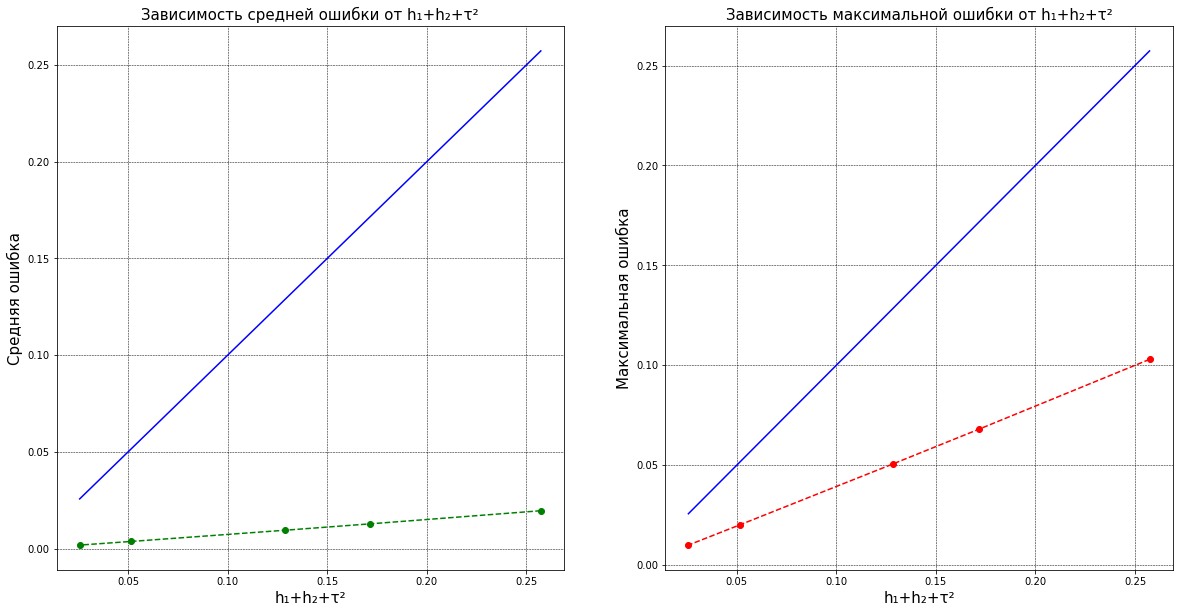

In [6]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1)
h1_s = np.array(h1_s)
h2_s = np.array(h2_s)
taus = np.array(taus)
ax.plot(h1_s+h2_s+np.square(taus), mean_error, '--go')
ax.plot(h1_s+h2_s+np.square(taus), h1_s+h2_s+np.square(taus), '-b')
plt.title('Зависимость средней ошибки от h₁+h₂+τ²', fontsize=15)
plt.xlabel('h₁+h₂+τ²', fontsize=15)
plt.ylabel('Средняя ошибка', fontsize=15)
plt.grid(color='black', linestyle='--', linewidth=0.5)
ax = fig.add_subplot(1, 2, 2)
ax.plot(h1_s+h2_s+np.square(taus), max_error, '--ro')
ax.plot(h1_s+h2_s+np.square(taus), h1_s+h2_s+np.square(taus), '-b')
plt.title('Зависимость максимальной ошибки от h₁+h₂+τ²', fontsize=15)
plt.xlabel('h₁+h₂+τ²', fontsize=15)
plt.ylabel('Максимальная ошибка', fontsize=15)
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()

Видно, что с уменьшением сетки средняя и максимальная погрешность уменьшаются.

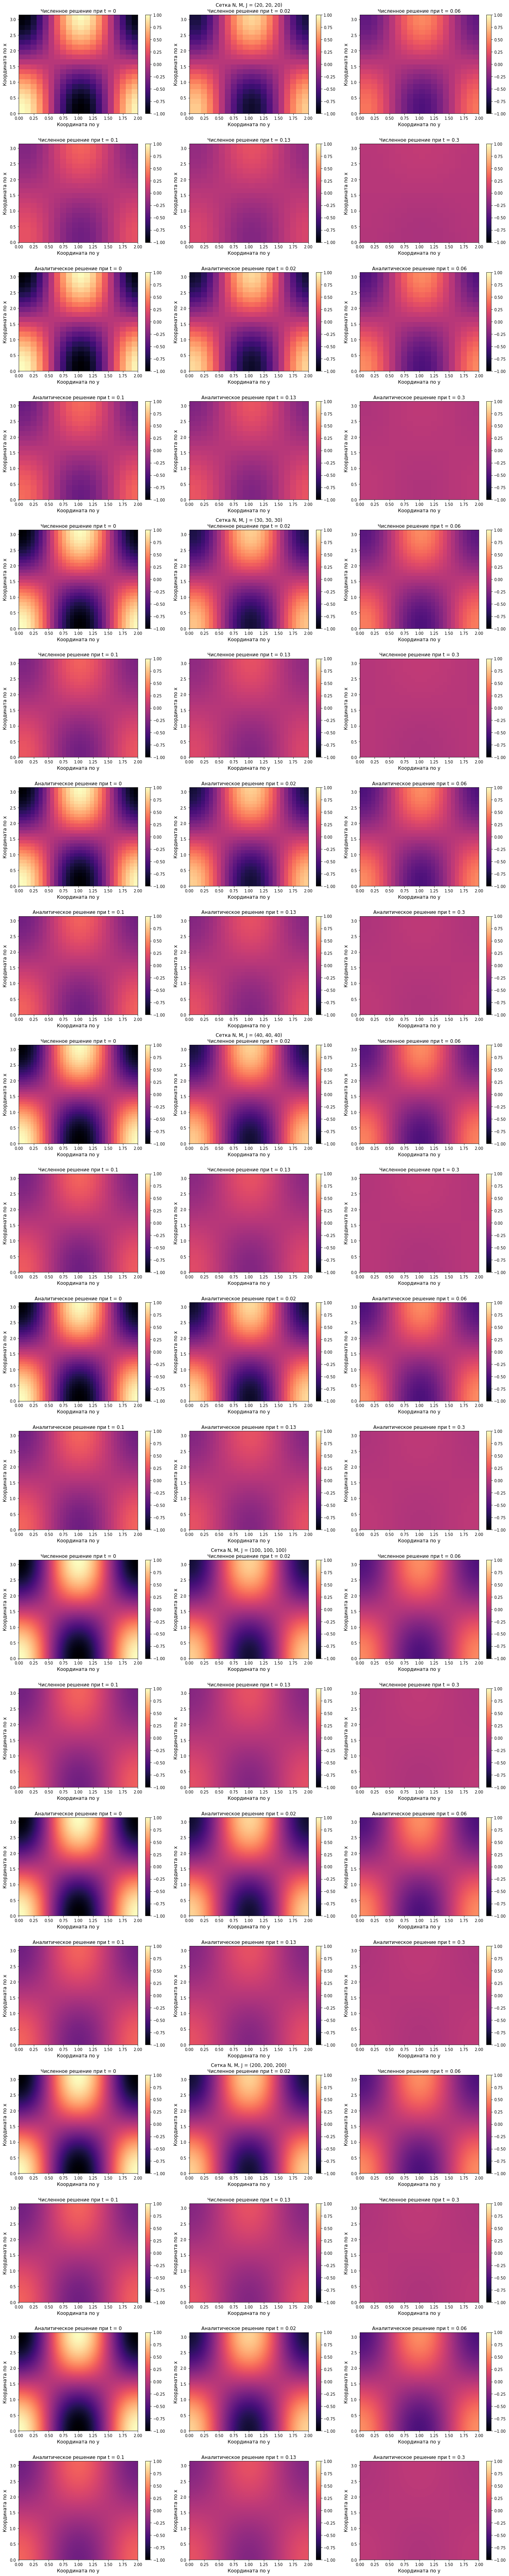

In [8]:
steps = len(num_sol)
fig = plt.figure(figsize = (18,18*steps))
times=[0,0.02, 0.06, 0.1, 0.13, 0.3]
n = 1
title_n = [2, 14, 26, 38, 50, 62, 74, 86]
for k in range(steps):
    for i in range(len(times)):
            
        ax = fig.add_subplot(steps*4, 3, n)
        N, M, J = num_sol[k][1], num_sol[k][2], num_sol[k][3]
        r = int(times[i]/T2*(2*J))
        x = np.linspace(X1,X2,N+1)
        y = np.linspace(Y1,Y2,M+1)
        plt.pcolormesh(y,x,num_sol[k][0][:,:,r],cmap='magma', vmin=-1, vmax=1)
        plt.colorbar()
        plt.ylabel('Координата по х', fontsize =12)
        plt.xlabel('Координата по y', fontsize =12)
        if n in title_n:
            plt.title('Сетка N, M, J = '+str((N, M, J))+'\nЧисленное решение при t = '+str(times[i]),fontsize=12)
        else:
            plt.title('Численное решение при t = '+str(times[i]),fontsize=12)
        n += 1
    for i in range(len(times)):
        ax = fig.add_subplot(steps*4, 3, n)
        N, M, J = num_sol[k][1], num_sol[k][2], num_sol[k][3]
        r = int(times[i]/T2*(J))
        x = np.linspace(X1,X2,N+1)
        y = np.linspace(Y1,Y2,M+1)
        plt.pcolormesh(y,x,sol[k][0][:,:,r],cmap='magma', vmin=-1, vmax=1)
        plt.colorbar()
        plt.ylabel('Координата по х', fontsize =12)
        plt.xlabel('Координата по y', fontsize =12)
        plt.title('Аналитическое решение при t = '+str(times[i]),fontsize=12)
        n+=1
plt.tight_layout()


Проверим выполнения начального условия.

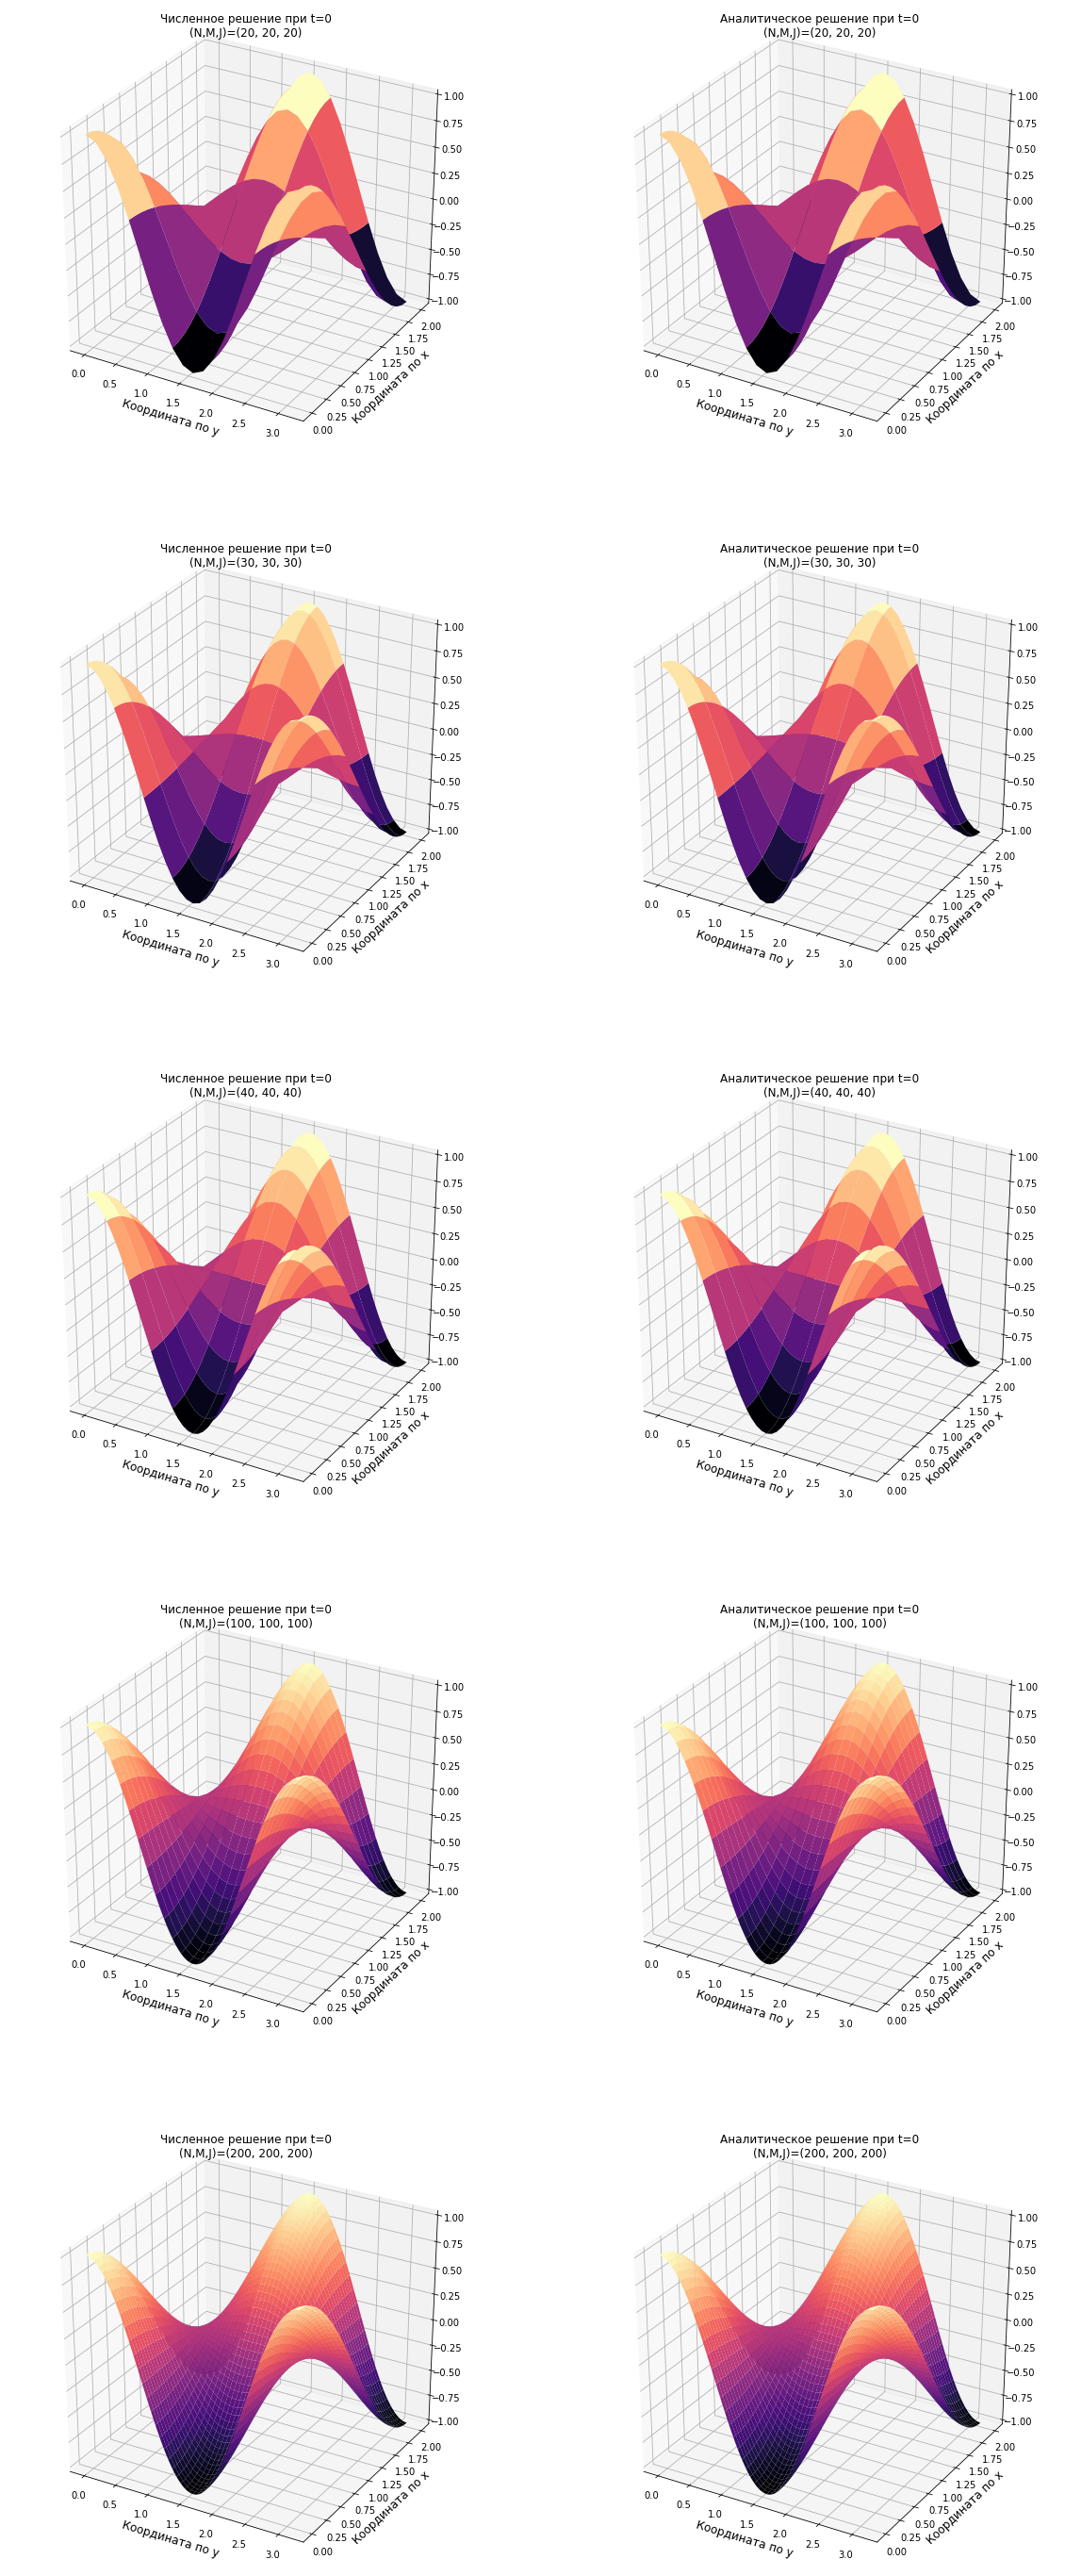

In [11]:
fig = plt.figure(figsize = (20, 10*steps))
n = 1

for k in range(steps):
    ax = fig.add_subplot(steps, 2, n, projection='3d')
    N, M, J = num_sol[k][1], num_sol[k][2], num_sol[k][3]
    x = np.linspace(X1,X2,N+1)
    y = np.linspace(Y1,Y2,M+1)
    x1,y1 = np.meshgrid(x,y)
    ax.plot_surface(x1, y1, num_sol[k][0][:,:,0], rstride=4, cstride=4, cmap = 'magma')
    plt.ylabel('Координата по х', fontsize =12)
    plt.xlabel('Координата по y', fontsize =12)
    plt.title('Численное решение при t=0\n(N,M,J)='+str((N,M,J)))
    n += 1
    ax = fig.add_subplot(steps, 2, n, projection='3d')
    N, M, J = sol[k][1], sol[k][2], num_sol[k][3]
    x = np.linspace(X1,X2,N+1)
    y = np.linspace(Y1,Y2,M+1)
    x1,y1 = np.meshgrid(x,y)
    ax.plot_surface(x1, y1, sol[k][0][:,:,0], rstride=4, cstride=4, cmap = 'magma')
    plt.ylabel('Координата по х', fontsize =12)
    plt.xlabel('Координата по y', fontsize =12)
    plt.title('Аналитическое решение при t=0\n(N,M,J)='+str((N,M,J)))
    n += 1
plt.show()
    

Проверим (визуально) выполнения грачниных условий, построив профили численного решений при различной густоте сетки, в разные моменты времени.

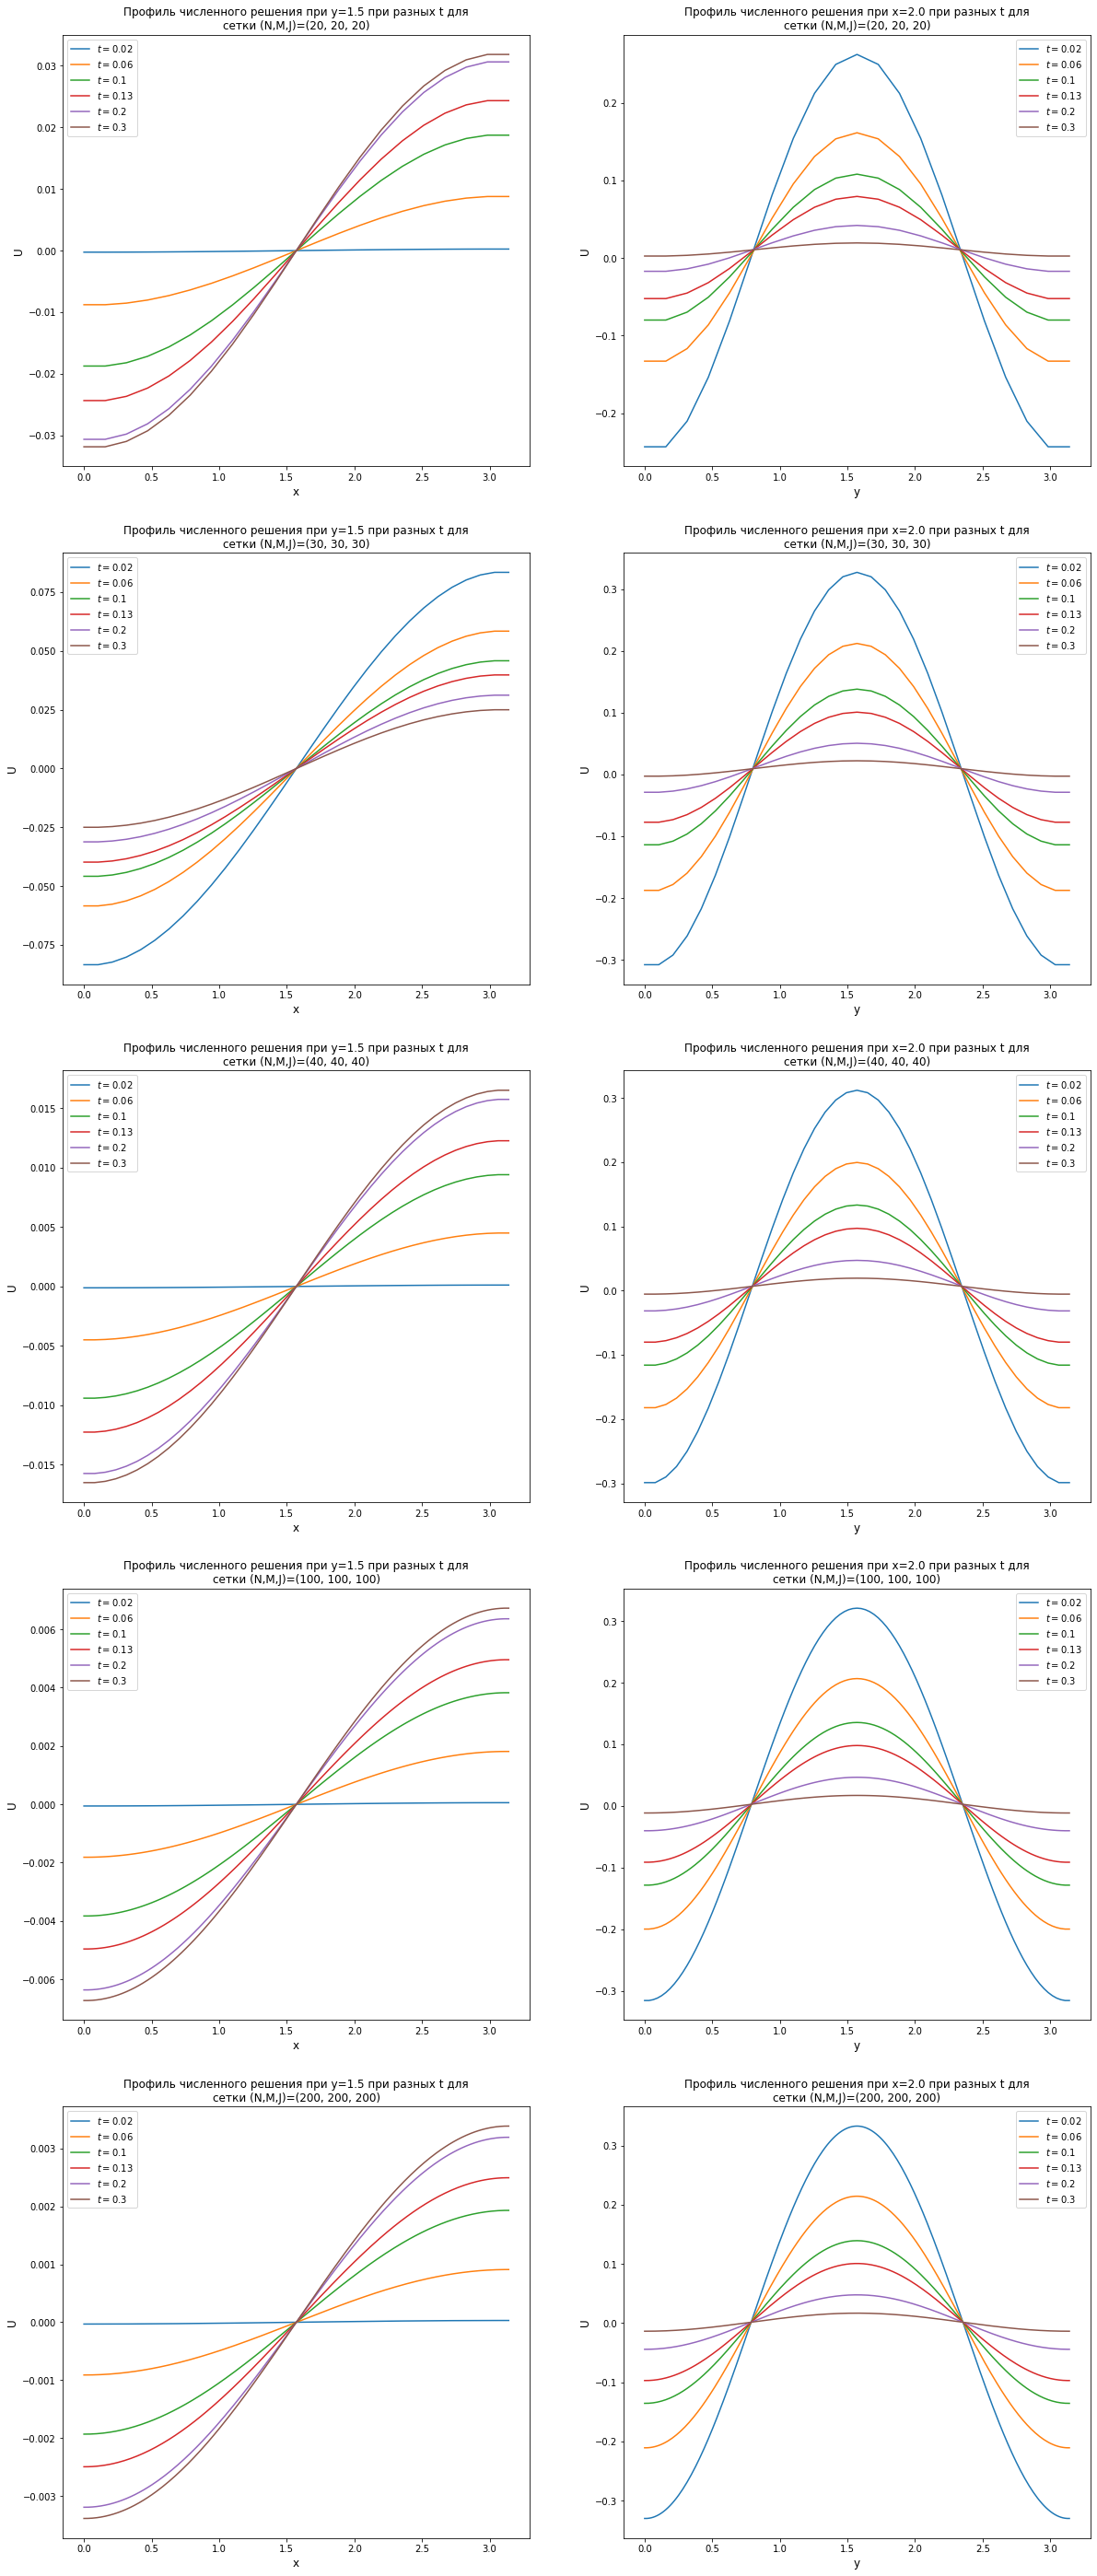

In [13]:
fig = plt.figure(figsize = (20, 10*steps))
n = 1
y1 = 1.5
x1 = 2.
times=[0.02, 0.06, 0.1, 0.13, 0.2, 0.3]
for k in range(steps):
    ax = fig.add_subplot(steps, 2, n)
    N, M, J = num_sol[k][1], num_sol[k][2], num_sol[k][3]
    x = np.linspace(X1,X2,N+1)
    for t in times:
        ax.plot(x, num_sol[k][0][:, int(y1/Y2*M), int(t/T2*J*2)], label='$t=$' +str(t))
    plt.ylabel('U', fontsize =12)
    plt.xlabel('x', fontsize =12)
    plt.title('Профиль численного решения при y=1.5 при разных t для\nсетки (N,M,J)='+str((N,M,J)))
    ax.legend(loc='best')
    n += 1
    ax = fig.add_subplot(steps, 2, n)
    y = np.linspace(X1,X2,M+1)
    for t in times:
        ax.plot(y, num_sol[k][0][int(x1/X2*N), :, int(t/T2*J*2)], label='$t=$' +str(t))
    plt.ylabel('U', fontsize =12)
    plt.xlabel('y', fontsize =12)
    plt.title('Профиль численного решения при x=2.0 при разных t для\nсетки (N,M,J)='+str((N,M,J)))
    ax.legend(loc='best')
    n += 1
plt.show()
    

Видно, что грничные условия выполняются.